In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('Rice_Cammeo_Osmancik.csv')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity\t,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [4]:
df = df.replace(['Cammeo','Osmancik'] ,[0,1])

In [5]:
x = df.drop(df.columns[7], axis=1)
y = df.iloc[:,7]

x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=.2, random_state=45)

In [6]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
model = Sequential()
model.add(Dense(7,activation='sigmoid'))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50


96/96 [==============================] - 2s 3ms/step - loss: 0.7560 - accuracy: 0.4222 - val_loss: 0.7134 - val_accuracy: 0.4501
Epoch 2/50
96/96 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.4226 - val_loss: 0.6846 - val_accuracy: 0.4554
Epoch 3/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.6198 - val_loss: 0.6702 - val_accuracy: 0.8320
Epoch 4/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.7838 - val_loss: 0.6615 - val_accuracy: 0.6785
Epoch 5/50
96/96 [==============================] - 0s 987us/step - loss: 0.6550 - accuracy: 0.6480 - val_loss: 0.6546 - val_accuracy: 0.5774
Epoch 6/50
96/96 [==============================] - 0s 994us/step - loss: 0.6473 - accuracy: 0.5951 - val_loss: 0.6481 - val_accuracy: 0.5656
Epoch 7/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.5928 - val_loss: 0.6416 - val_accuracy: 0.5656
Epoch 8/50
96/

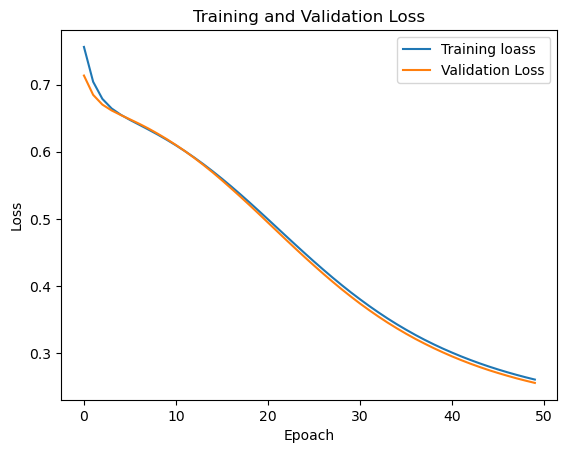

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loass')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoach')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(x_test)
y_pred = [0 if val <0.5 else 1 for val in y_pred]
accuracy_score(y_test, y_pred)

24/24 [==============================] - 0s 708us/step


0.926509186351706

In [14]:
model.save('rice sigmoid')

INFO:tensorflow:Assets written to: rice sigmoid\assets


INFO:tensorflow:Assets written to: rice sigmoid\assets


In [15]:
cm = confusion_matrix(y_test, y_pred)

In [16]:
cm

array([[311,  32],
       [ 24, 395]], dtype=int64)